<a href="https://colab.research.google.com/github/IT-17005/Transfer-Learning/blob/master/Schizo_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import The Libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path="/content/drive/MyDrive/dataset/data/train"
valid_path="/content/drive/MyDrive/dataset/data/validation"

In [4]:
# resnet = ResNet50(
#     input_shape = IMAGE_SIZE + [3], 
#     weights = 'imagenet',
#     pooling='avg',classes=2, 
#     include_top = False  
# )

inceptionv3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMAGE_SIZE + [3],
    pooling='max',
    classes=2,
    classifier_activation="softmax",
)

87924736/87910968 [==============================] - 4s 0us/step


In [5]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [7]:
# This will let us use the default weights used by the imagenet.  
for layer in inceptionv3.layers:
    layer.trainable = False

In [8]:
# Set the flatten layer.
x = Flatten() (inceptionv3.output)

In [9]:
prediction = Dense(2, activation = 'softmax')(x)

In [10]:
# Create a model Object
model = Model(inputs = inceptionv3.input, outputs = prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
# Use the Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [13]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 282 images belonging to 2 classes.


In [14]:
test_set = train_datagen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary'
)

Found 95 images belonging to 2 classes.


In [15]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
# Fit the model.
hist = model.fit(training_set, validation_data = test_set, steps_per_epoch = 10, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 113s 11s/step - loss: 0.3164 - accuracy: 0.8625 - val_loss: 1.5148 - val_accuracy: 0.5474
Epoch 2/5
10/10 [==============================] - 36s 4s/step - loss: 0.1507 - accuracy: 0.9286 - val_loss: 0.7548 - val_accuracy: 0.7053
Epoch 3/5
10/10 [==============================] - 35s 4s/step - loss: 0.0341 - accuracy: 0.9870 - val_loss: 0.7263 - val_accuracy: 0.6842
Epoch 4/5
10/10 [==============================] - 29s 3s/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 1.3917 - val_accuracy: 0.6211
Epoch 5/5
10/10 [==============================] - 33s 3s/step - loss: 0.0439 - accuracy: 0.9937 - val_loss: 0.7451 - val_accuracy: 0.7368


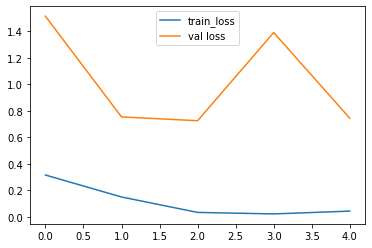

In [17]:
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

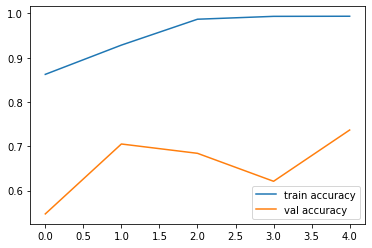

In [18]:
# Plot the Accuracy
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')